<a href="https://colab.research.google.com/github/SethaVa/ARKit-CoreLocation/blob/master/ImageConvertor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

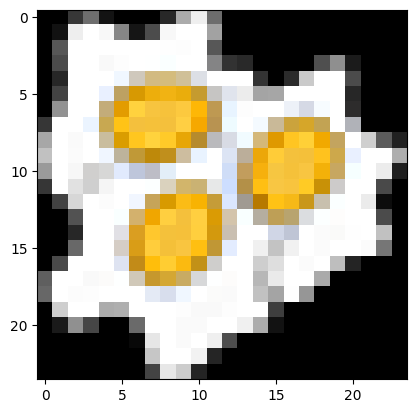

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

# Import image from url
urllib.request.urlretrieve('https://i.stack.imgur.com/uEojM.png', 'eggs.png');

# Show image
img1 = Image.open('eggs.png')
plt.imshow(img1)


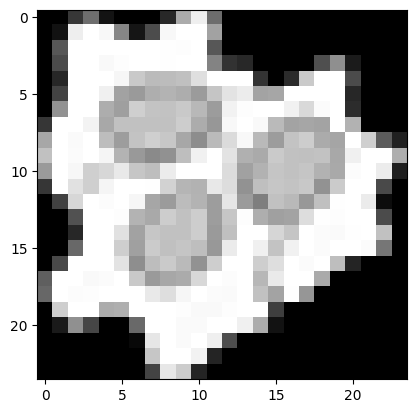

In [6]:
# convert image to 8-bit grayscale
img2 = Image.open('eggs.png').convert('L')
plt.imshow(img2, cmap='gray');


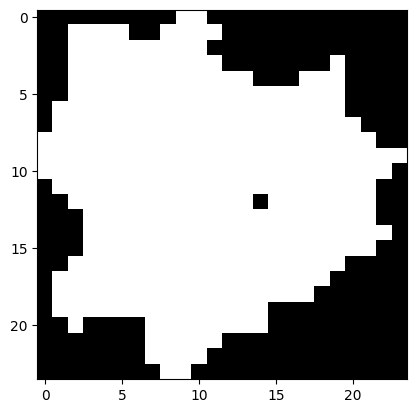

In [7]:
# Convert the image to grayscale
threshold = 128
binary_image = img2.point(lambda x: 0 if x < threshold else 255, '1')

plt.imshow(binary_image)


In [10]:
WIDTH, HEIGHT = img2.size
# convert image data to a list of integers
data = list(img2.getdata())

# convert that to 2D list (list of lists of integers)
data = [data[offset:offset+WIDTH] for offset in range(0, WIDTH*HEIGHT, WIDTH)]

# At this point the image's pixels are all in memory and can be accessed
# individually using data[row][col].

# Show image pixel value
for row in data:
    print(' '.join('{:3}'.format(value) for value in row))


  0   0  55 110  19   0   0   0  40 171 239 109   0   0   0   0   0   0   0   0   0   0   0   0
  0  18 238 255 248 134  21  76 248 255 255 162   0   0   0   0   0   0   0   0   0   0   0   0
  0  87 255 255 255 255 255 255 254 253 255  87   0   0   0   0   0   0   0   0   0   0   0   0
  0  75 255 255 249 253 255 255 254 255 255 132  50  41   0   0   0   0  79 143  27   0   0   0
  0  39 255 255 255 246 201 187 188 192 223 255 255 255  51   0  43 202 255 255  75   0   0   0
  0  67 255 255 240 162 154 174 179 173 155 197 228 236 164 166 255 255 255 255  39   0   0   0
  0 146 255 255 173 159 207 196 194 201 184 156 242 253 255 255 241 217 251 255  44   0   0   0
 54 255 255 243 168 193 193 193 193 205 172 151 248 255 249 186 163 166 163 255 178   0   0   0
167 255 250 255 189 157 196 207 199 167 141 186 219 248 185 156 196 205 171 165 255 207  92  33
193 255 251 255 245 179 153 138 145 190 241 255 227 176 170 202 193 192 194 168 240 255 255 174
154 255 247 207 215 233 198 190 236 255 

In [9]:
# representate pixel value as desired.
chars = '@%#*+=-:. '
scale = (len(chars)-1)/255.
print()
for row in data:
    print(' '.join(chars[int(value*scale)] for value in row))


@ @ % * @ @ @ @ % - . * @ @ @ @ @ @ @ @ @ @ @ @
@ @ .   . + @ # .     = @ @ @ @ @ @ @ @ @ @ @ @
@ *             . .   * @ @ @ @ @ @ @ @ @ @ @ @
@ #     . .     .     + % % @ @ @ @ # = @ @ @ @
@ %       . : - - - :       % @ % :     # @ @ @
@ #     . = = - - - = - . . = =         % @ @ @
@ =     - = : - - : - = . .     . : .   % @ @ @
%     . = - - - - : - = .   . - = = =   - @ @ @
=   .   - = - : : = + - : . - = - : - =   : * %
-   .   . - = + = - .   . - - : - - - = .     -
=   . : : . - - .       : = - - - - - = .   . %
%   : : .     . : - - . : = - - - : = :     # @
@ # :   .   . = = - - = . = + - - = - .   . @ @
@ @ #     . - = : - : = - . - = = : . .     # @
@ @ %     : = - - - : = -     : -   . . .   - @
@ @ *     : = : - - - = .   . - .   .     . + @
@ #       . = - : - = :     : :   .   - % @ @ @
*     . .   : = = - :   .   - .     - @ @ @ @ @
*   . .       . : .   . .   - = . = @ @ @ @ @ @
@ :     - -       . . . .     # @ @ @ @ @ @ @ @
@ @ = # @ @ *     . .     . - @ @ @ @ @